<a href="https://colab.research.google.com/github/harishahamed26/PredictionOfHeartRate/blob/main/HeartRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [38]:
import pandas as pd
import numpy  as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

In [3]:
df_HeartRate = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/PredictionOfHeartRate/main/PT_Train.csv')
df_HeartRate.head(5)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


In [4]:
df_HeartRate = df_HeartRate.drop(['Lifetouch Respiration Rate', 'Oximeter SpO2',
       'Oximeter Pulse'], axis = 1)

In [4]:
df_HeartRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp (GMT)       226 non-null    object
 1   Lifetouch Heart Rate  226 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [5]:
df_HeartRate.isna().sum()

Timestamp (GMT)         0
Lifetouch Heart Rate    0
dtype: int64

In [6]:
df_HeartRate.describe()

,Lifetouch Heart Rate
count,226.000000
mean,2315.615044
std,11351.588825
min,106.000000
25%,136.000000
50%,145.000000
75%,156.000000
max,61442.000000


In [5]:
df_HeartRate['Timestamp (GMT)'] = df_HeartRate['Timestamp (GMT)'].replace({'/' : '-'} , regex=True)
df_HeartRate['Timestamp (GMT)'] 

0      17-08-2015 15:09
1      17-08-2015 15:10
2      17-08-2015 15:11
3      17-08-2015 15:12
4      17-08-2015 15:13
             ...       
221    17-08-2015 18:50
222    17-08-2015 18:51
223    17-08-2015 18:52
224    17-08-2015 18:53
225    17-08-2015 18:54
Name: Timestamp (GMT), Length: 226, dtype: object

In [6]:
Step_Count = list(range(0, len(df_HeartRate)))


In [7]:
def Plot_TimeSeries(x,y):  
    plt.figure(figsize=(10,10))
    plt.plot(x ,y , color = 'Red')
    plt.title("Line Graph for 'Lifetouch Heart Rate' and 'Step Count' ")
    plt.xlabel('Lifetouch Heart Rate')
    plt.ylabel('Step Count')
    plt.show()


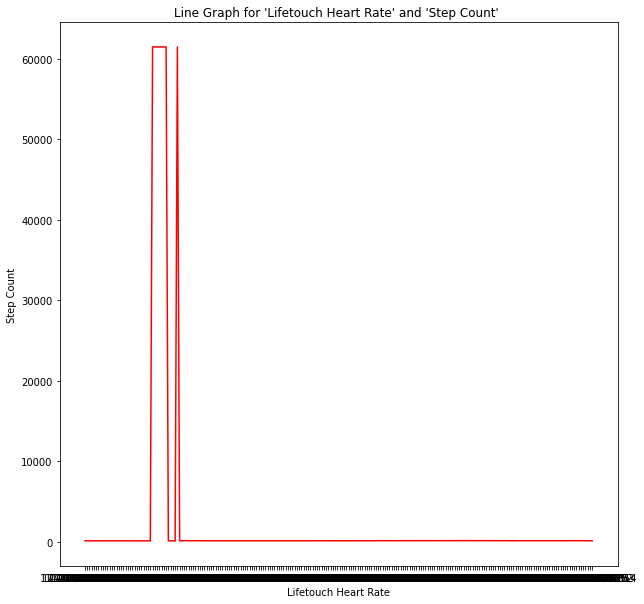

In [8]:
Plot_TimeSeries(df_HeartRate['Timestamp (GMT)'],df_HeartRate['Lifetouch Heart Rate'])

In [9]:
def Check_Stationary(series):
    statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
    print(f'p value : {p_value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')



In [10]:
import warnings
warnings.filterwarnings('ignore')


Check_Stationary(df_HeartRate['Lifetouch Heart Rate'])

p value : 0.1
Result: The series is stationary 



In [11]:
import numpy as np
df_HeartRate['Lifetouch Heart Rate'] = np.where(df_HeartRate['Lifetouch Heart Rate']>200,np.nan,df_HeartRate['Lifetouch Heart Rate'])


In [12]:
df_HeartRate['Lifetouch Heart Rate']= df_HeartRate['Lifetouch Heart Rate'].ffill()


In [14]:
# Convert the month column to a datetime object
df_HeartRate['Timestamp (GMT)'] = pd.to_datetime(df_HeartRate['Timestamp (GMT)'])



In [49]:
# Set the month column as the index
df_HeartRate.set_index('Timestamp (GMT)', inplace=True)

In [ ]:
df_HeartRate.drop('predict', axis = 1)

In [40]:
from pmdarima.arima import auto_arima

model_fit = auto_arima(df_HeartRate['Lifetouch Heart Rate'], m=12,d=0,D=0,max_order=None,max_p=7,max_q=7,
                       max_d=2,max_P=7,max_Q=7,max_D=2,maxiter = 100,alpha = 0.05,n_jobs = -1,seasonal=False,
                       trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True
                       )

model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1367.585, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2894.836, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1367.524, Time=0.98 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1384.791, Time=0.36 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1369.171, Time=0.58 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=1.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1387.242, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1369.565, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1360.850, Time=0.53 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1502.420, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1374.085, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1359.655, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  226
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -673.828
Date:                Fri, 03 Feb 2023   AIC                           1359.655
Time:                        03:55:02   BIC                           1380.178
Sample:                             0   HQIC                          1367.937
                                - 226                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.4593      4.394      1.925      0.054      -0.153      17.072
ar.L1          0.5456      0.145      3.757      0.000       0.261       0.830
ar.L2          0.3958      0.147      2.694      0.007       0.108       0.684
ma.L1          0.2905      0.126      2.302      0.021       0.043       0.538
ma.L2         -0.3651      0.056     -6.465      0.000      -0.476      -0.254
sigma2        22.5565      1.050     21.486      0.000      20.499      24.614
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2307.23
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

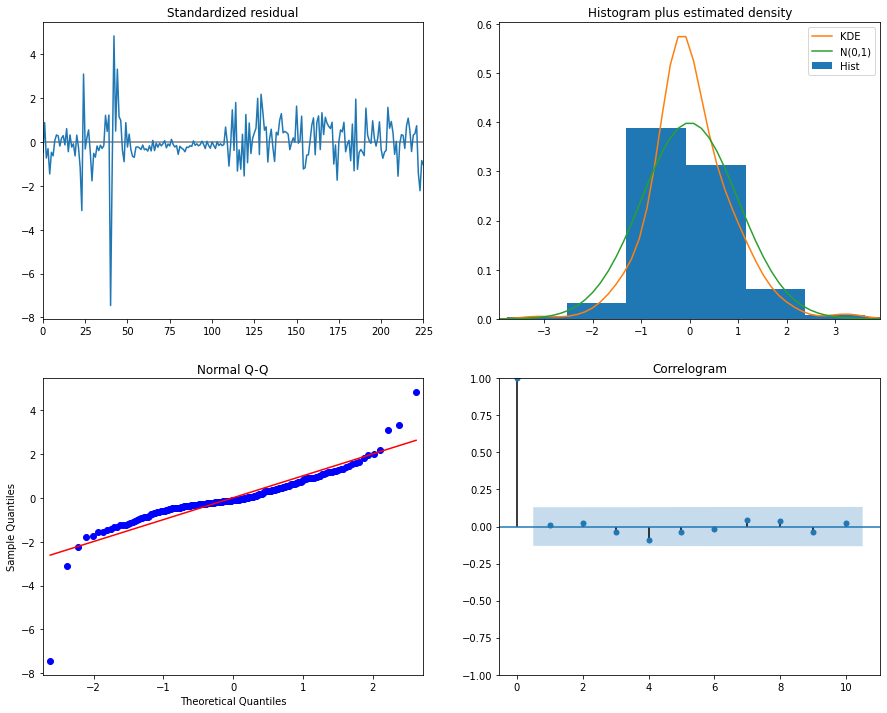

In [41]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [27]:
#here I have done forecasting with ARMA model
# Import the necessary libraries
from statsmodels.tsa.arima_model import ARIMA


# Split the data into training and testing sets
'''
train = df_HeartRate[:'2015-08-17 18:54:00']
test = df_HeartRate['2015-08-17 18:55:00':]

'''

train = df_HeartRate['Lifetouch Heart Rate']
test = df_HeartRate['Lifetouch Heart Rate'][226:]



# Fit the ARMA model
model = ARIMA(train, order=(2,0,2))
model_fit = model.fit()


In [28]:
l1  = len(df_HeartRate['Lifetouch Heart Rate'])
l2  = len(df_HeartRate['Lifetouch Heart Rate'])+20

print(l1,l2)

226 246


In [29]:
# testing 

#df_HeartRate['predict'] =  model_fit.predict(start='2015-08-17 18:54:00', end='2015-08-17 19:15:00')

test =  model_fit.predict(start = l1, end=l2)

In [30]:
test.head(21)

226    139.182373
227    140.811826
228    140.368004
229    140.770378
230    140.814398
231    140.997591
232    141.114979
233    141.251508
234    141.372452
235    141.492463
236    141.605799
237    141.715124
238    141.819619
239    141.919891
240    142.015949
241    142.108037
242    142.196290
243    142.280880
244    142.361954
245    142.439661
246    142.514139
dtype: float64

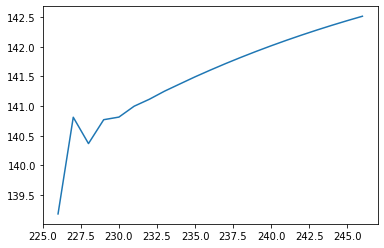

In [31]:
test.plot()

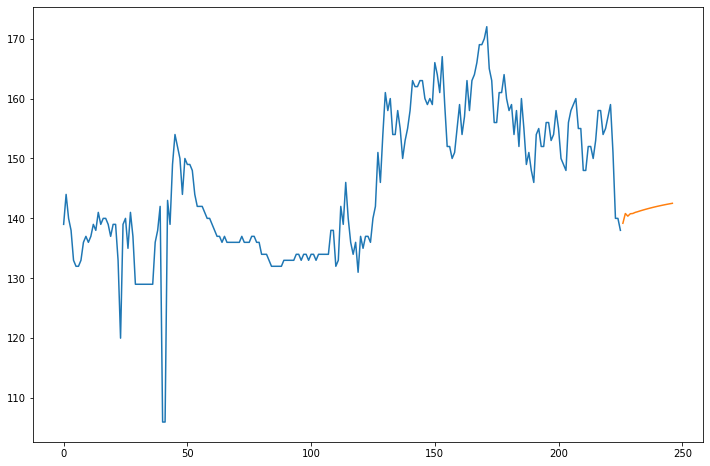

In [32]:
df_HeartRate['Lifetouch Heart Rate' ].plot(figsize=(12,8))
test.plot()

AttributeError: ignored

In [ ]:
# Predict the next quarter of 1961
predictions = model_fit.predict(start='2015-08-17 18:54:00', end='2015-08-17 19:15:00')
predictions

2015-08-17 18:54:00    142.552035
2015-08-17 18:55:00    139.452580
2015-08-17 18:56:00    141.122700
2015-08-17 18:57:00    140.163358
2015-08-17 18:58:00    140.772582
2015-08-17 18:59:00    140.700757
2015-08-17 19:00:00    140.811060
2015-08-17 19:01:00    141.190702
2015-08-17 19:02:00    141.171899
2015-08-17 19:03:00    141.387710
2015-08-17 19:04:00    141.509022
2015-08-17 19:05:00    141.608819
2015-08-17 19:06:00    141.768899
2015-08-17 19:07:00    141.860793
2015-08-17 19:08:00    141.981036
2015-08-17 19:09:00    142.089128
2015-08-17 19:10:00    142.183783
2015-08-17 19:11:00    142.286679
2015-08-17 19:12:00    142.375509
2015-08-17 19:13:00    142.464191
2015-08-17 19:14:00    142.549032
2015-08-17 19:15:00    142.627836
Freq: T, dtype: float64

In [ ]:
Pred_HR = predictions.reset_index(drop=True).values
Pred_HR_StepCount = list(range(max(Step_Count), max(Step_Count)+len(predictions)))  


In [ ]:
Actual_HR =df_HeartRate.reset_index(drop=True).values

In [ ]:
df_HeartRate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2015-08-17 15:09:00 to 2015-08-17 18:54:00
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lifetouch Heart Rate  226 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


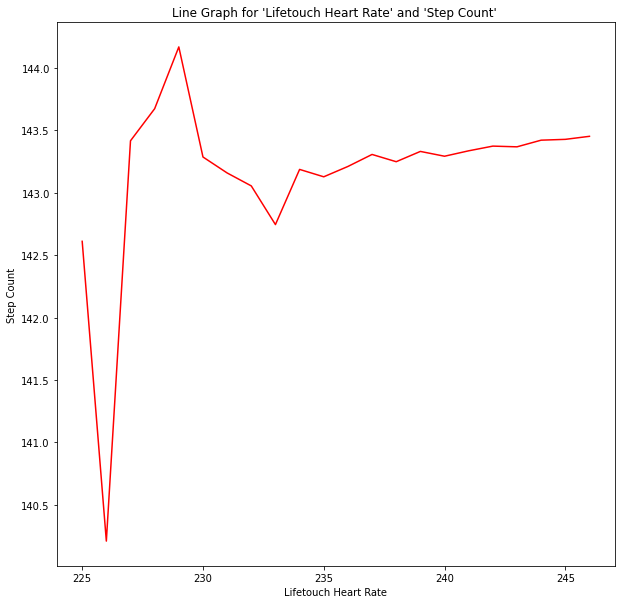

In [ ]:

Plot_TimeSeries(Pred_HR_StepCount, Pred_HR)

In [ ]:
df_HeartRate[:-1]

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139.0
2015-08-17 15:10:00,144.0
2015-08-17 15:11:00,140.0
2015-08-17 15:12:00,138.0
2015-08-17 15:13:00,133.0
...,...
2015-08-17 18:49:00,157.0
2015-08-17 18:50:00,159.0
2015-08-17 18:51:00,151.0


IndexError: ignored

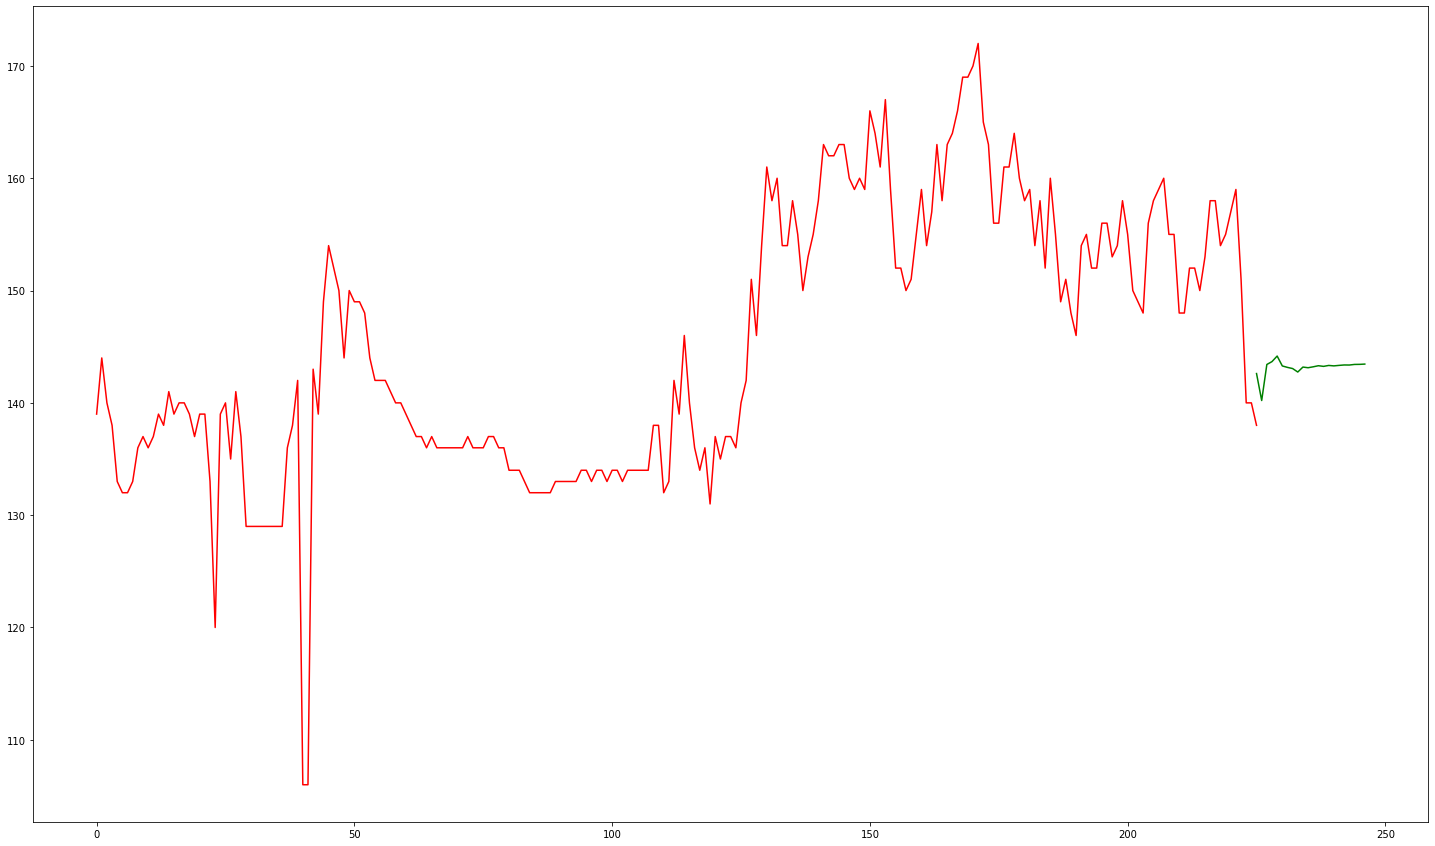

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(Step_Count, Actual_HR,color = 'Red', label = 'Actual Heart Rate')
plt.plot(Pred_HR_StepCount, Pred_HR, color = 'Green', label = 'Predicted Heart Rate')
plt.ylim = (0, max(Step_Count1))
plt.fill_between(139.0, 142.611549, 0, color ='blue')
plt.title(" Heart Rate ")
plt.xlabel('Lifetouch Heart Rate')
plt.ylabel('Rates')
plt.legend()
plt.show()

In [ ]:
# Obtain the AIC and BIC
print('AIC: ', model_fit.aic)
print('BIC: ', model_fit.bic)

AIC:  1363.2357612373314
BIC:  1390.6000412315097
